In [138]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [19]:
training_data = pd.read_csv('training_data.csv')
training_data

,Unnamed: 0,len,readability_score,num_links,num_ai_keywords,contains_ai_keywords,average_len,percent_short,percent_duplicate,emoji_density,percent_unique_words,generic_praise_ratio,std,variance,mean_similarity,similarity_std,label
0,0,2908,39.941462,26,0,False,71,0.298387,0.000000,0.020000,0.533125,0.000000,0.223166,0.206596,0.133567,0.109128,human
1,1,2554,42.938009,7,0,False,70,0.272059,0.000000,0.012527,0.504357,0.007353,0.224339,0.209176,0.119273,0.105253,human
2,2,4926,38.513936,52,0,False,73,0.227941,0.000000,0.015401,0.527350,0.014706,0.225373,0.211068,0.112698,0.106157,human
3,3,2889,38.801031,26,0,False,66,0.365854,0.000000,0.021579,0.487984,0.006098,0.232367,0.210374,0.173670,0.139476,human
4,4,3122,44.831613,28,0,False,54,0.476562,0.007812,0.031155,0.590426,0.000000,0.251222,0.232578,0.130055,0.110775,human
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2475,2475,467,3.702500,5,0,False,78,0.394958,0.000000,0.044794,0.500000,0.050420,0.238224,0.208331,0.221896,0.153774,human
2476,2476,355,-7.518545,4,0,False,59,0.554745,0.007299,0.026374,0.561905,0.007299,0.250395,0.220682,0.209137,0.147134,human
2477,2477,406,-19.045833,5,0,False,83,0.425197,0.007874,0.027174,0.505978,0.015748,0.238429,0.210940,0.205873,0.156429,human
2478,2478,462,-7.199545,5,0,False,46,0.519231,0.000000,0.029915,0.630342,0.000000,0.253094,0.221154,0.183314,0.201055,human


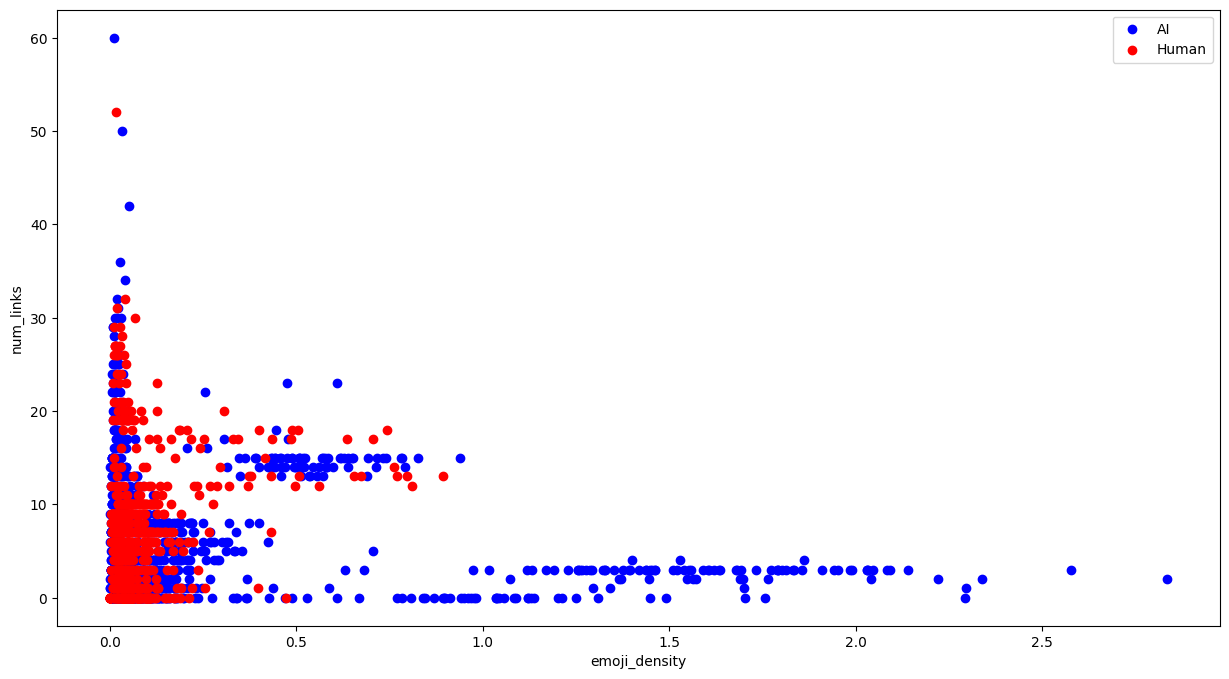

In [20]:
fig, ax = plt.subplots()
fig.set_size_inches(15,8)

x_axis = 'emoji_density'
y_axis = 'num_links'

human_df = training_data[training_data['label'] == 'human']
ai_df = training_data[training_data['label'] != 'human']

ax.scatter(ai_df[x_axis], ai_df[y_axis], label='AI', color='blue')
ax.scatter(human_df[x_axis], human_df[y_axis], label='Human', color='red')

ax.set_ylabel(y_axis)
ax.set_xlabel(x_axis)


ax.legend()
plt.show()

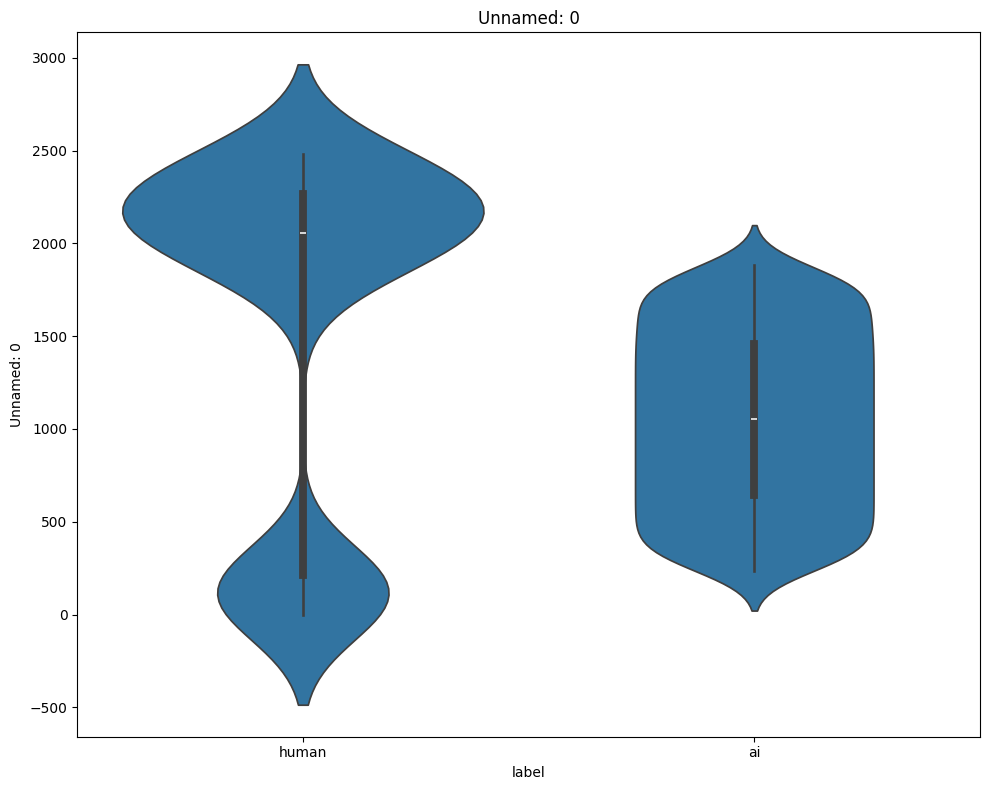

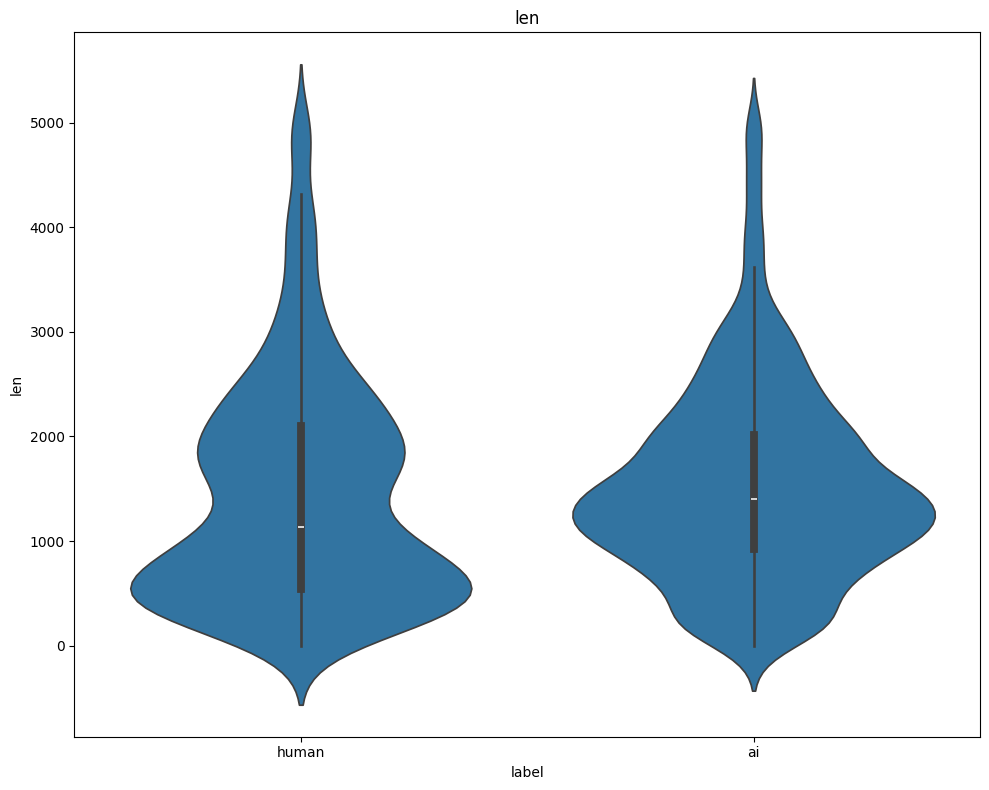

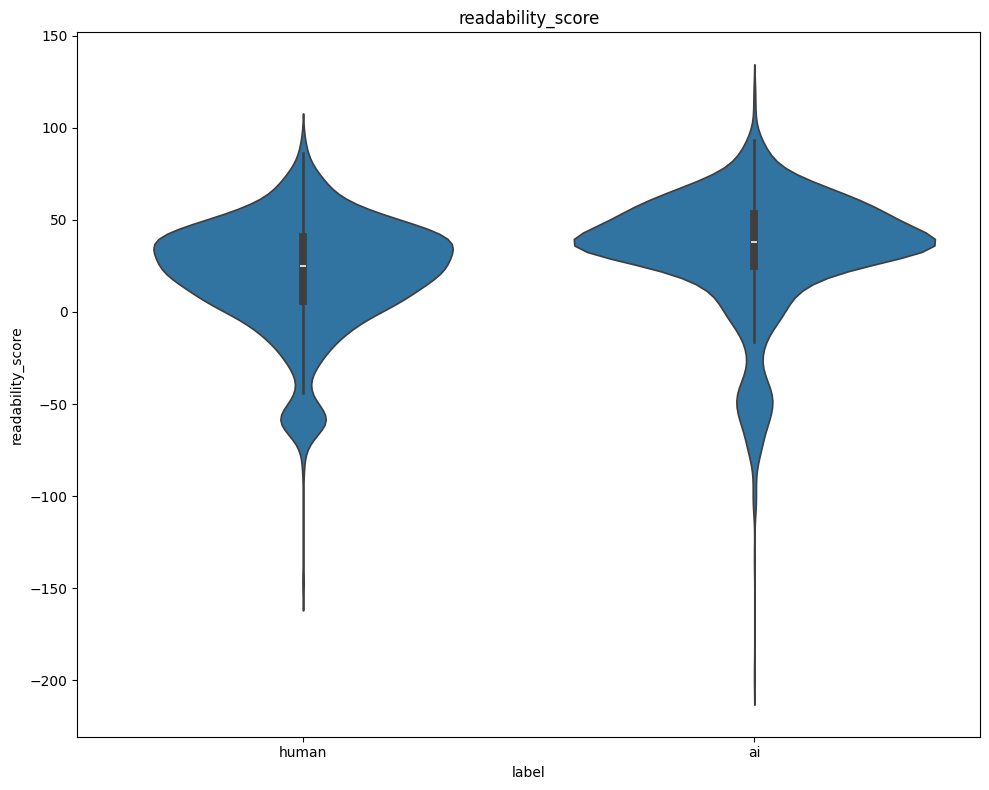

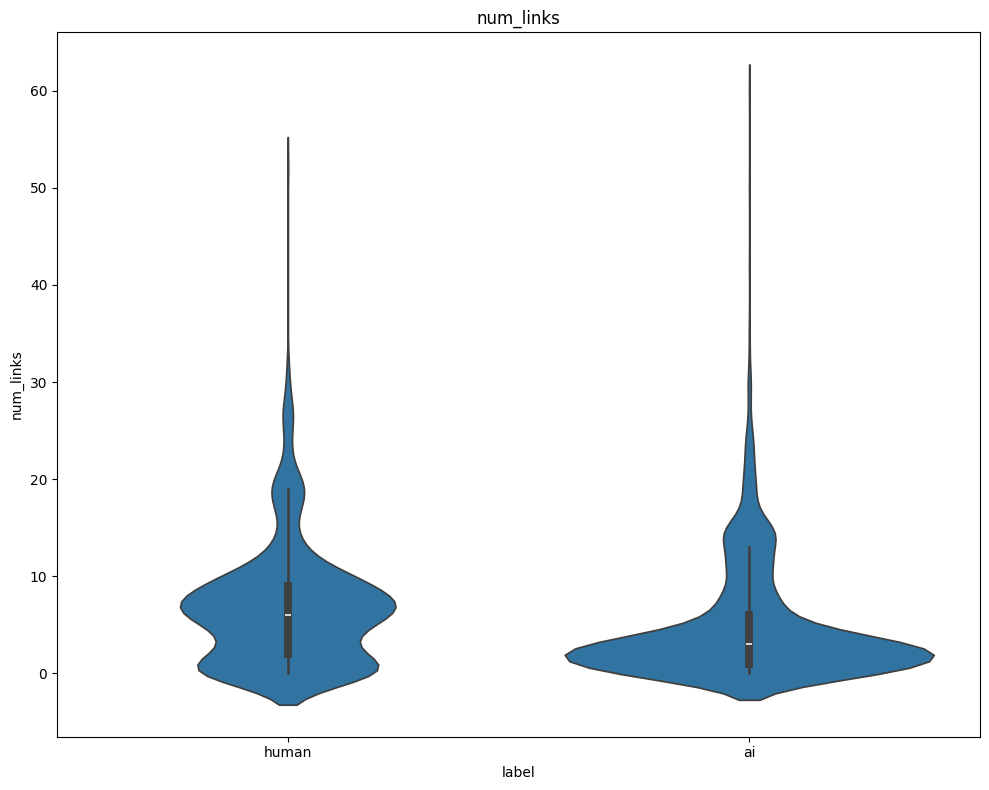

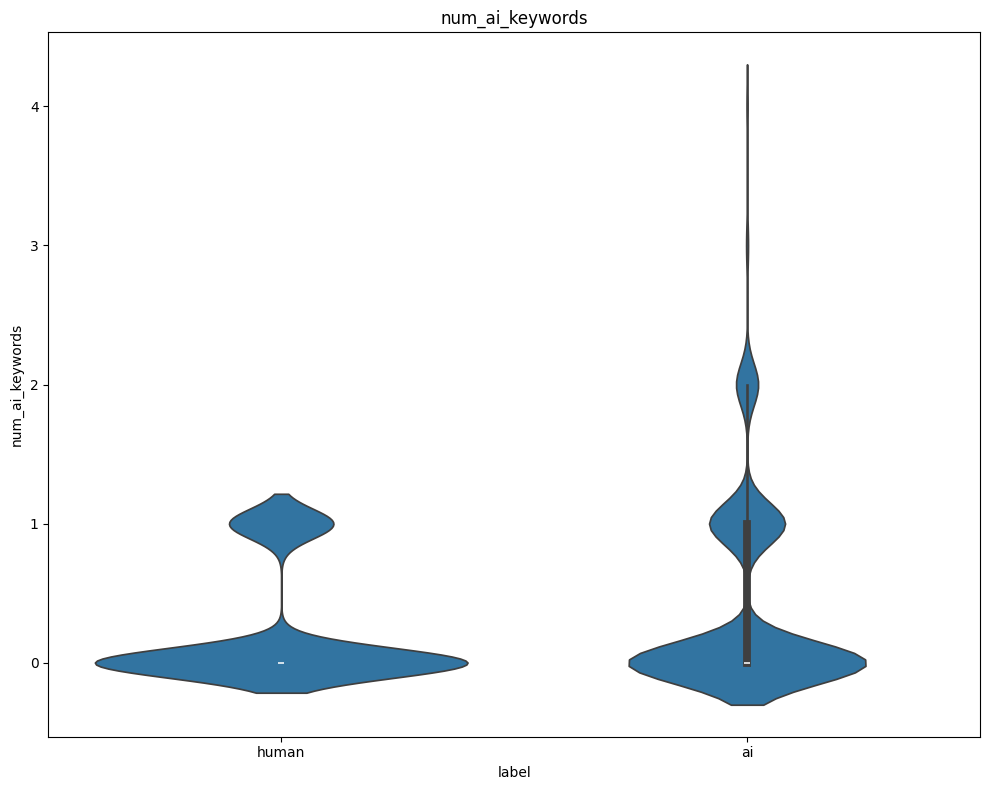

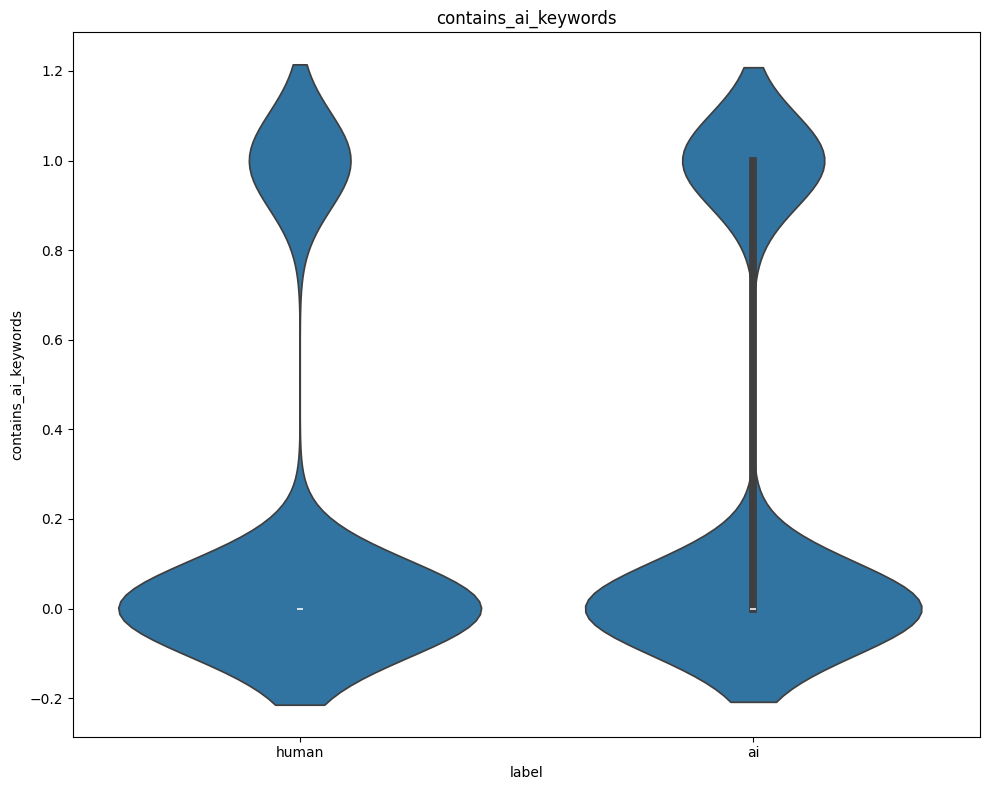

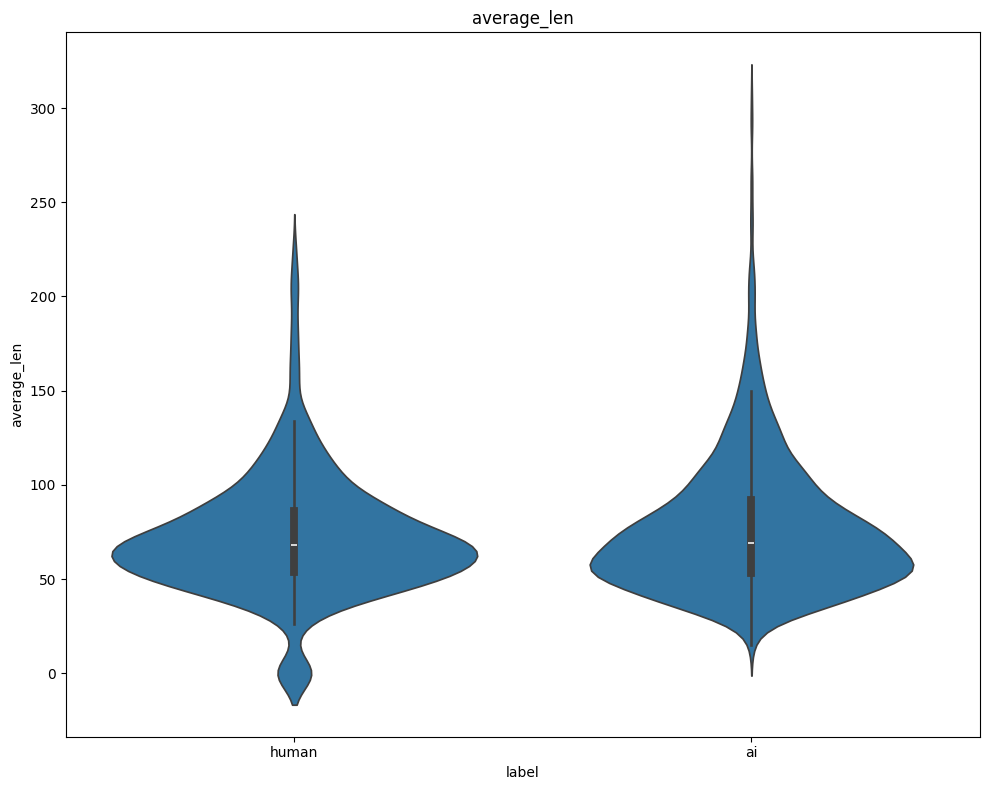

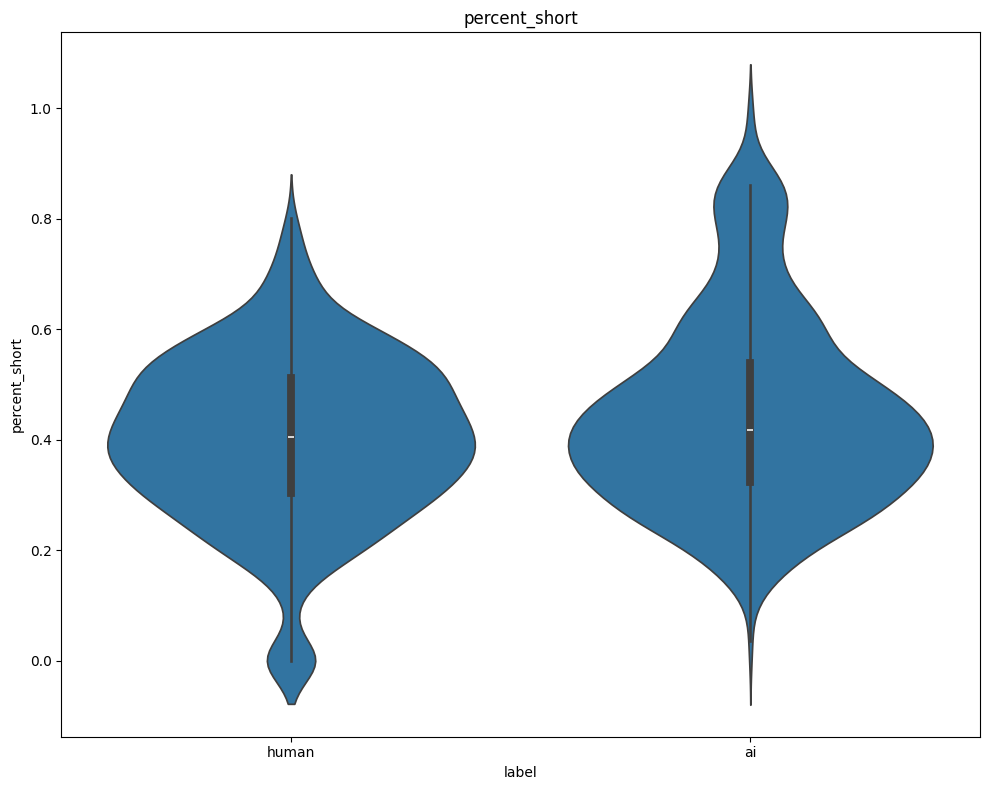

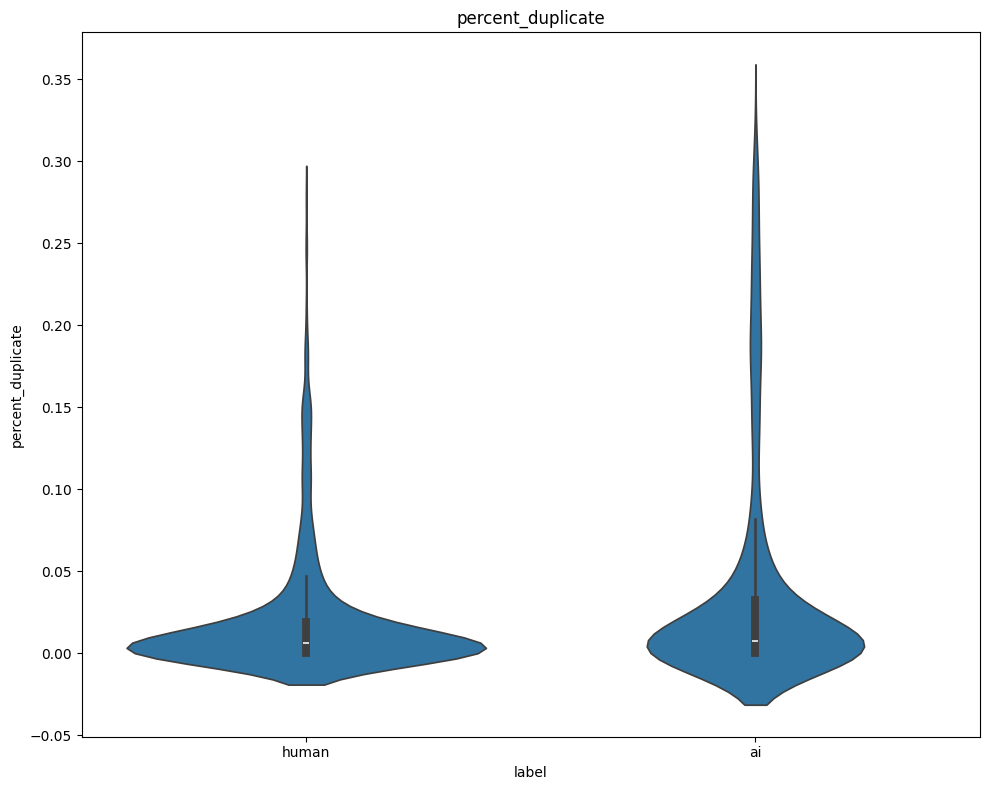

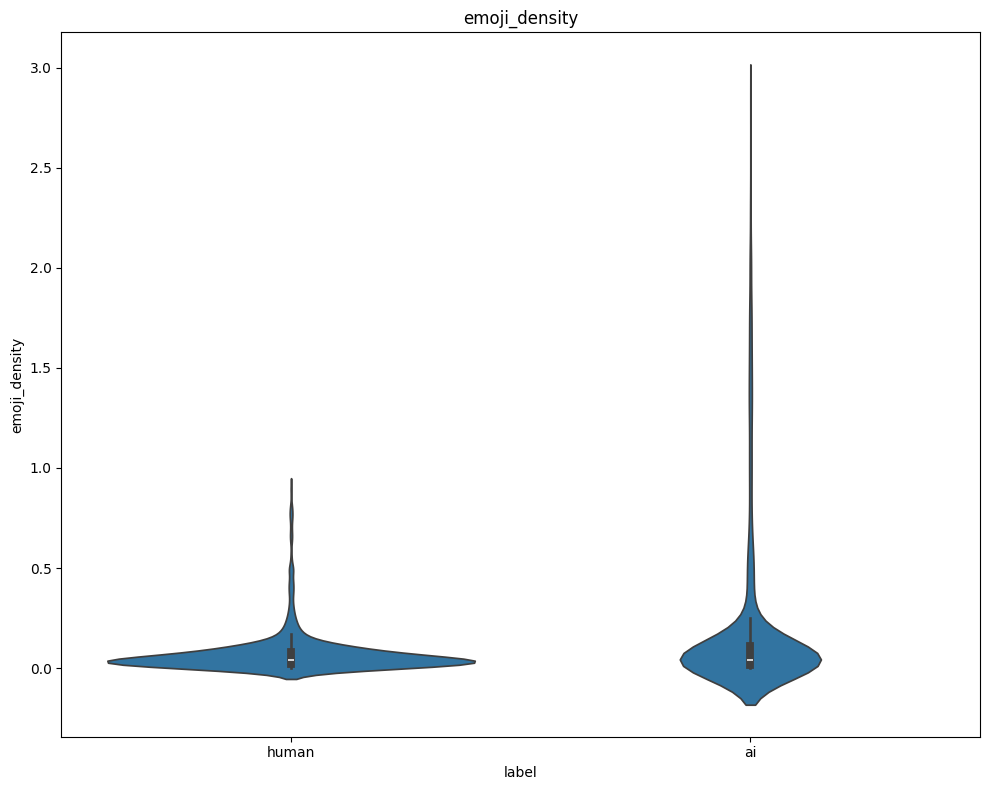

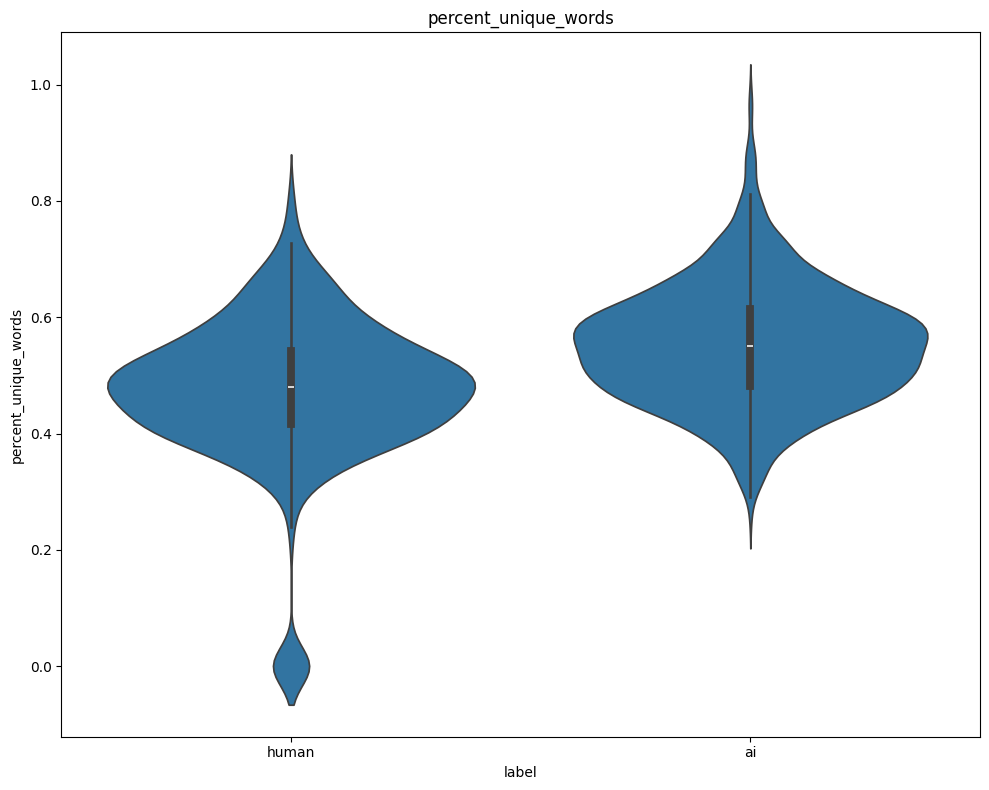

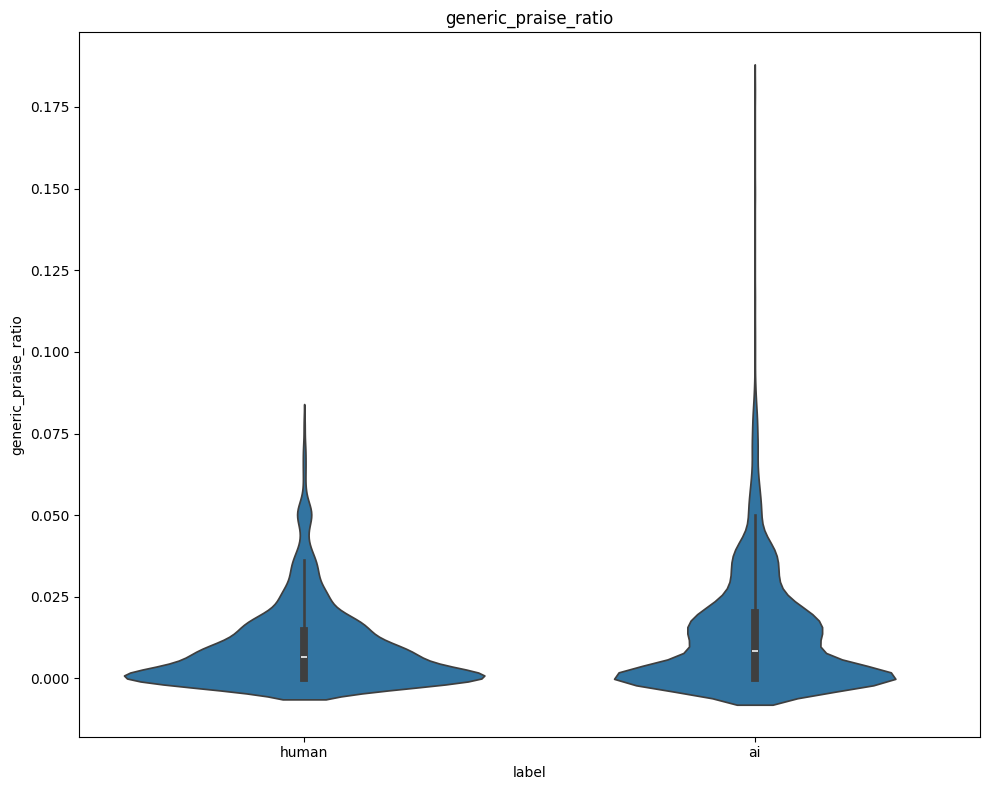

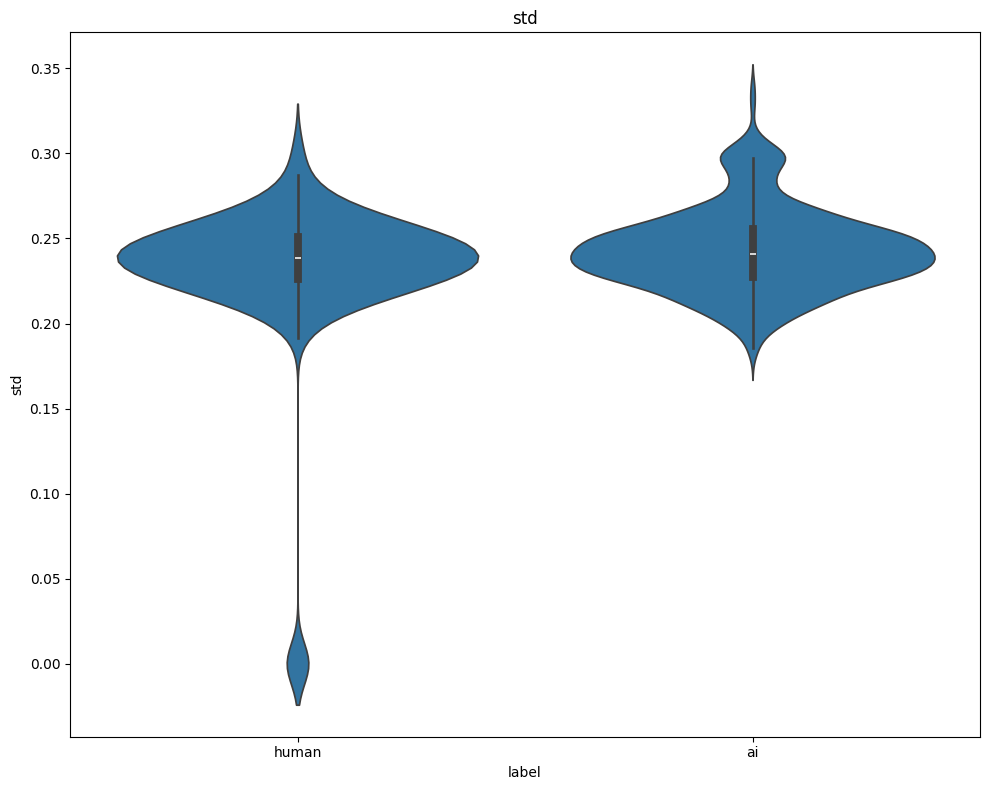

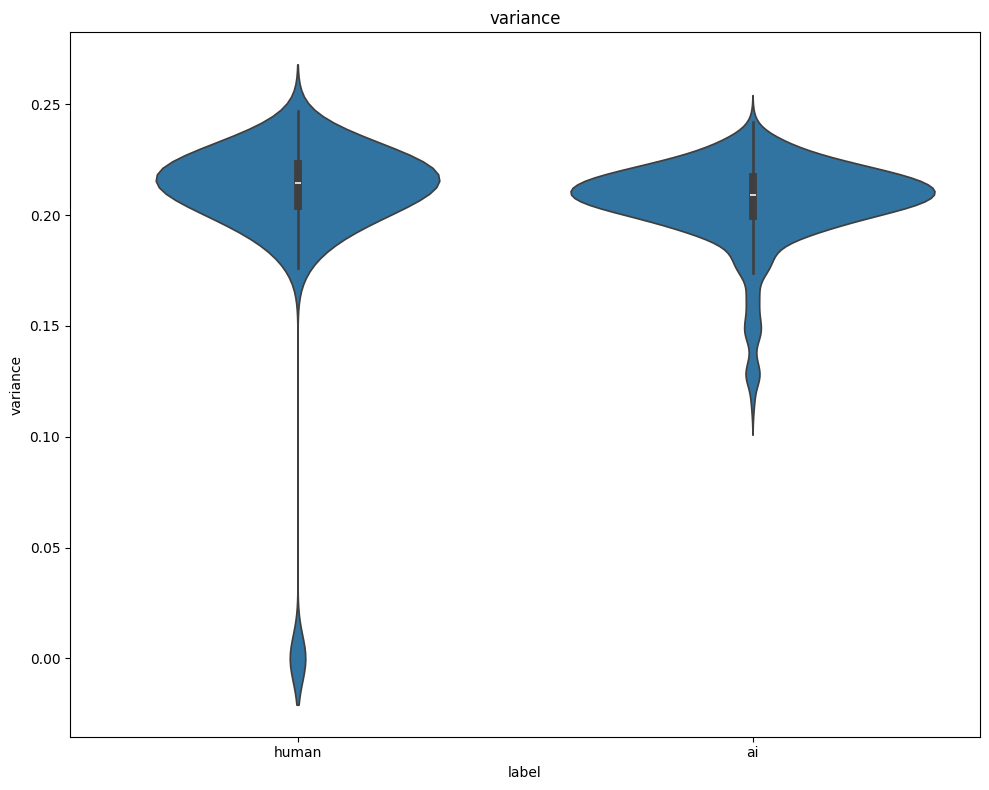

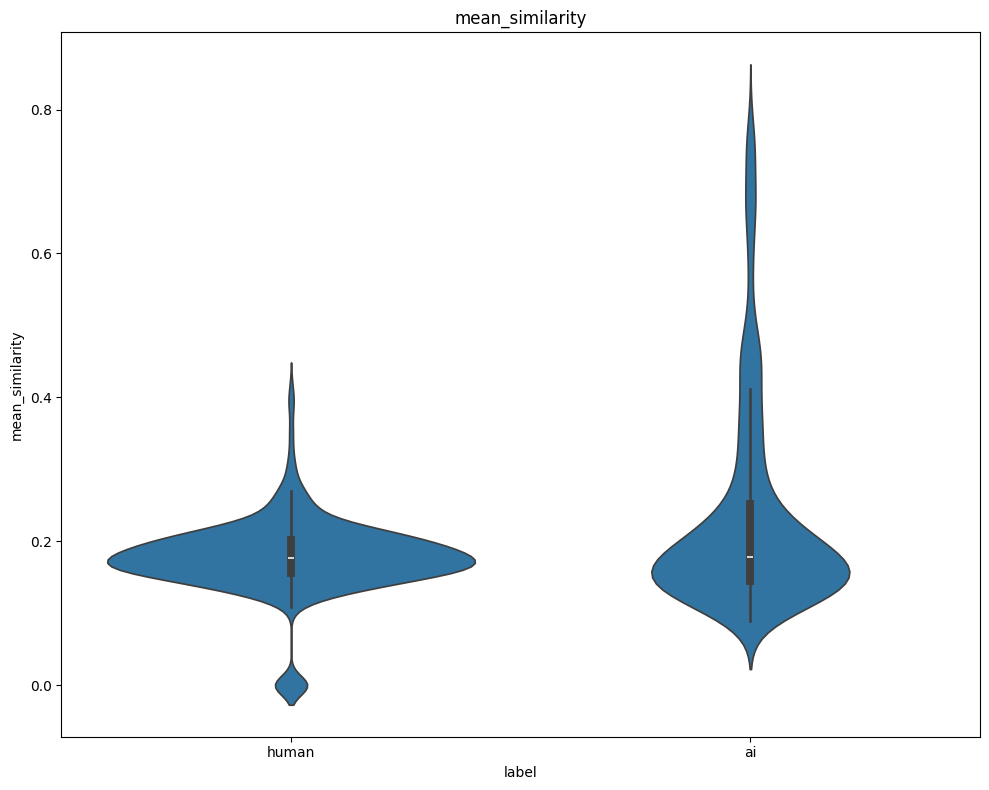

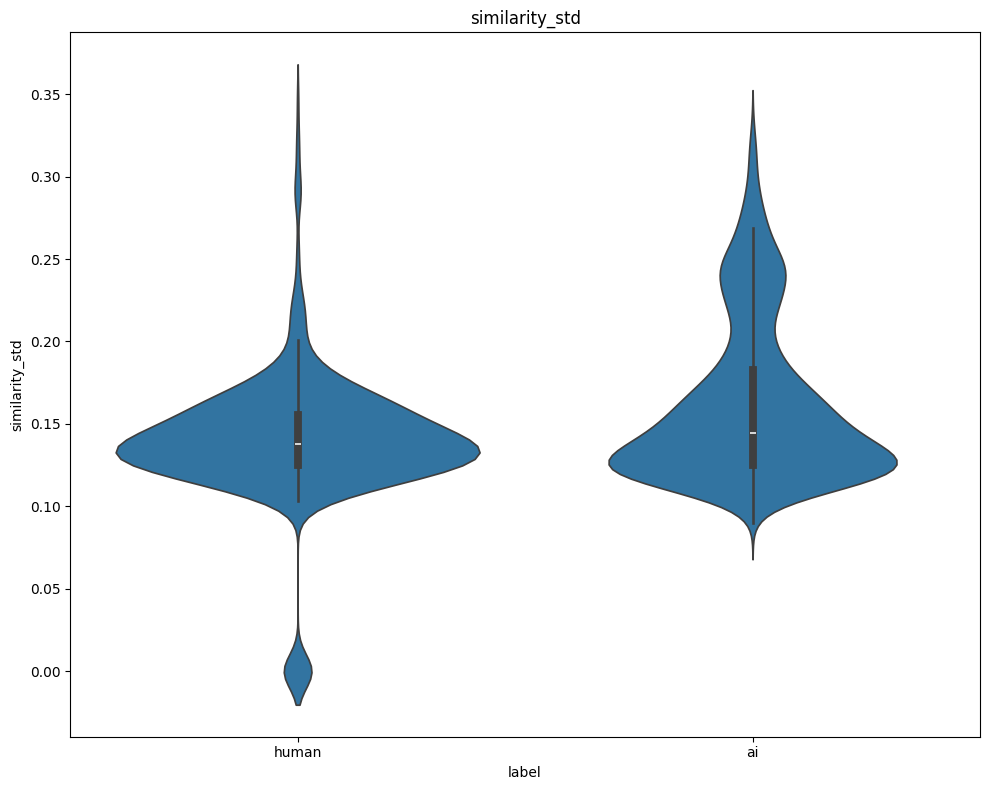

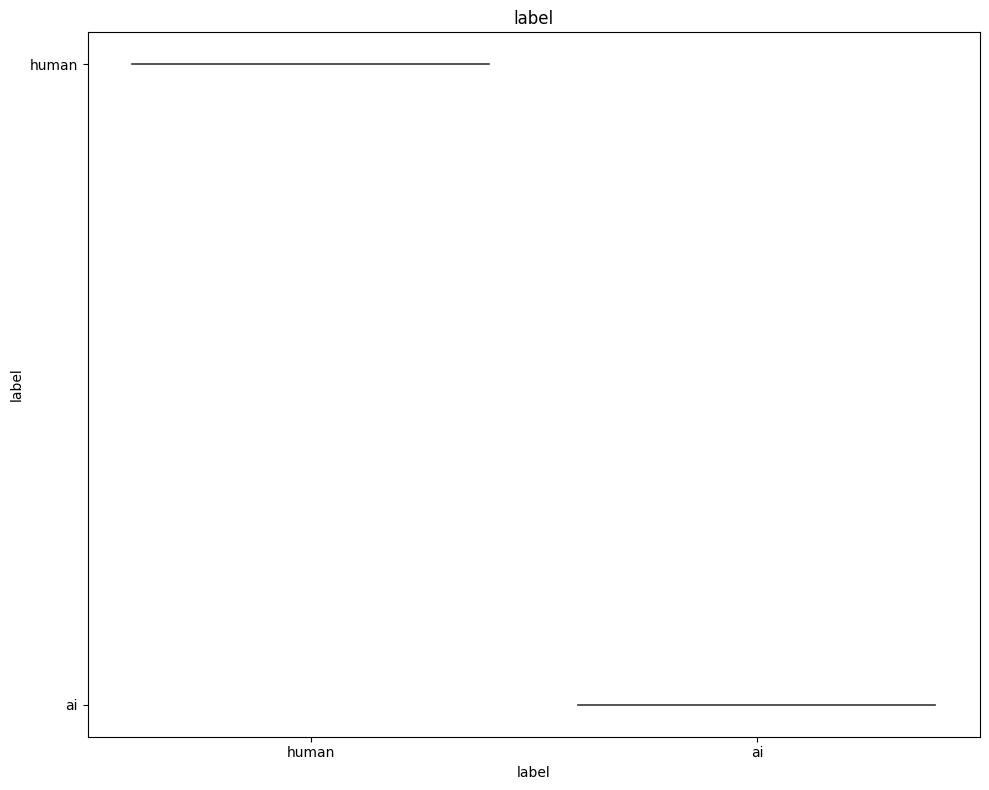

In [21]:
import pandas as pd
import matplotlib.pyplot as plt


for col in training_data:
    plt.figure(figsize=(10, 8))
    sns.violinplot(data=training_data, x="label", y=col)
    plt.title(col)
    plt.tight_layout()
    plt.show()


In [25]:
df_pca = pd.DataFrame(data=X_pca_full, index=training_data['video_id'])
avgs_by_video = df_pca.groupby(df_pca.index).median()

labels_df = training_data.drop_duplicates(subset=['video_id'])[['video_id', 'label']].set_index('video_id')
labels = avgs_by_video.merge(labels_df, left_index=True, right_index=True)['label']

pca_2d = PCA(n_components=2)
X_2d = pca_2d.fit_transform(avgs_by_video.to_numpy())

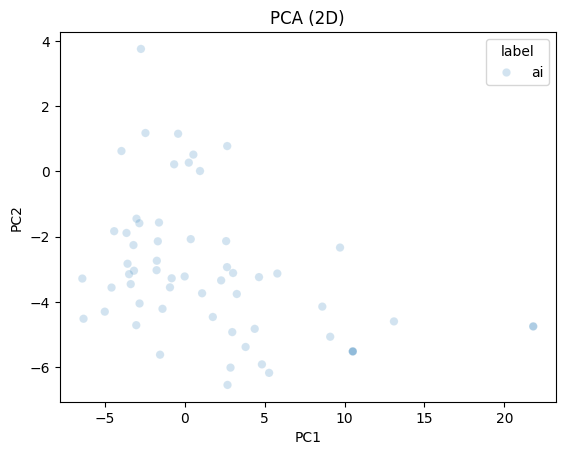

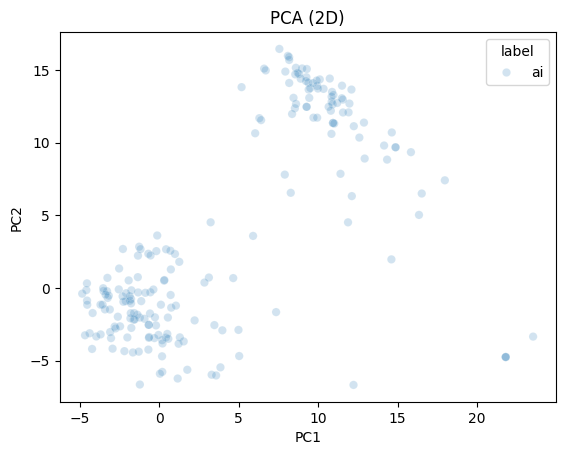

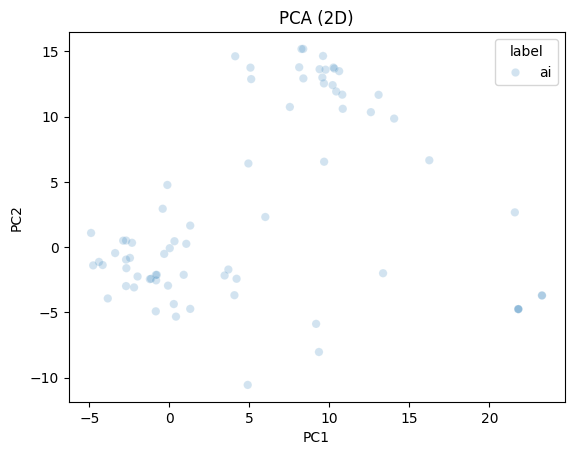

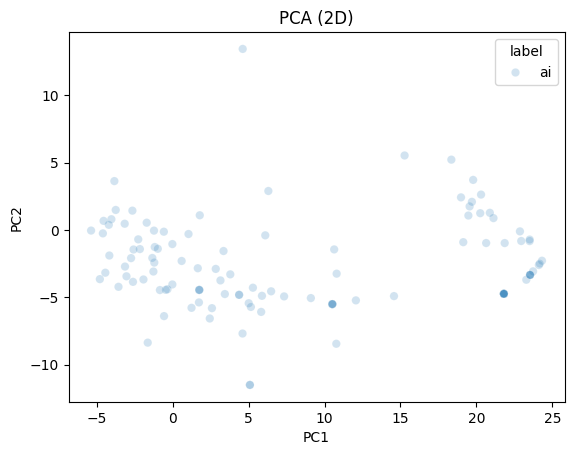

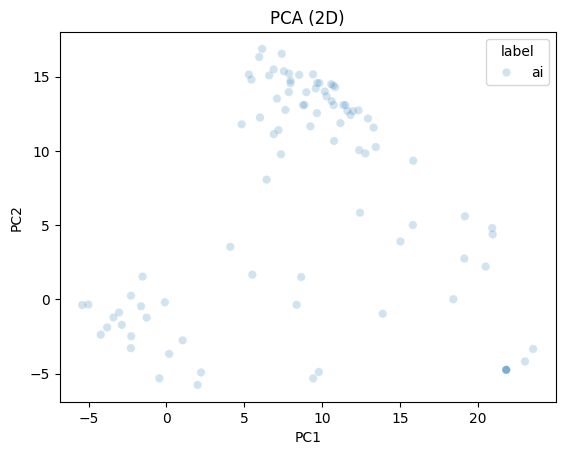

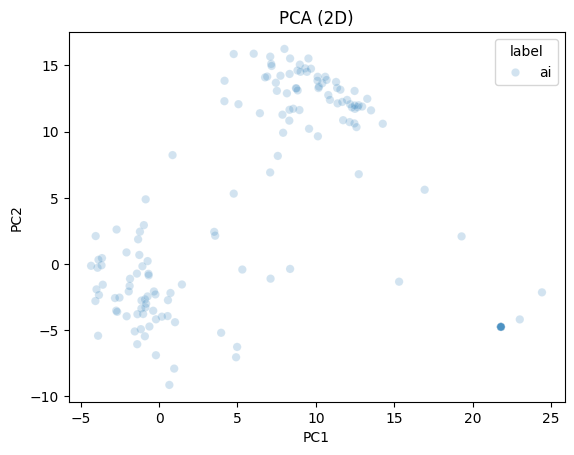

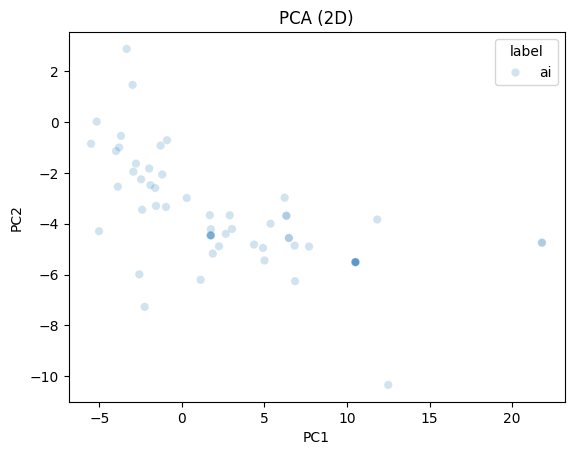

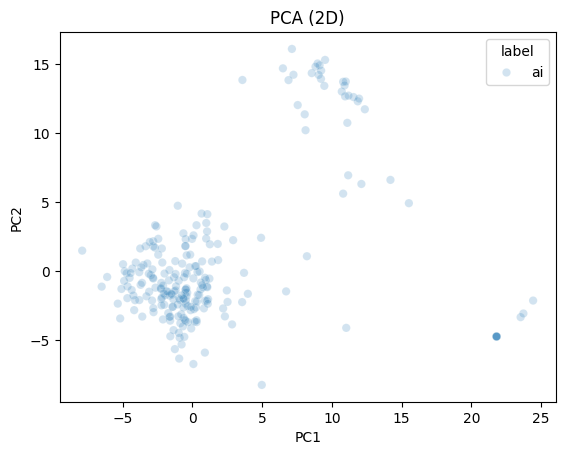

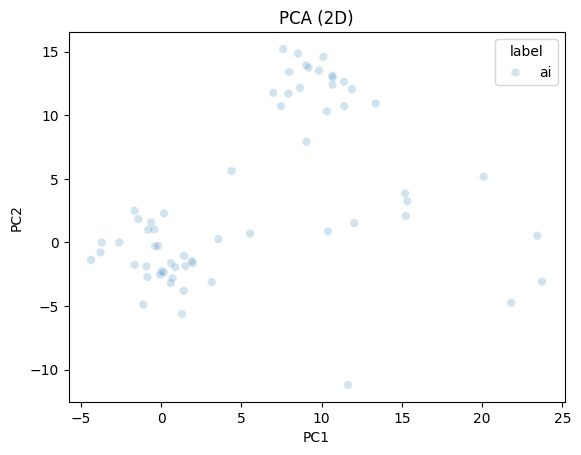

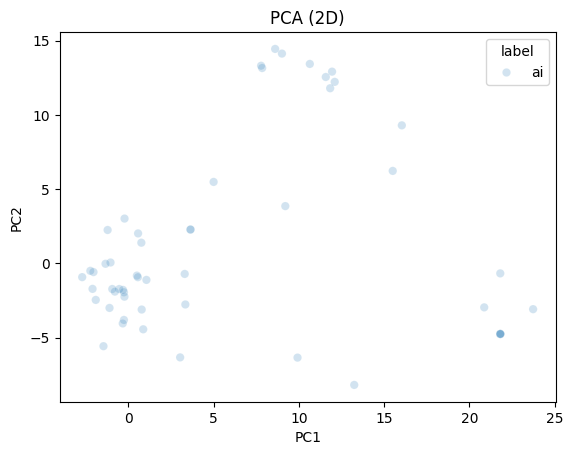

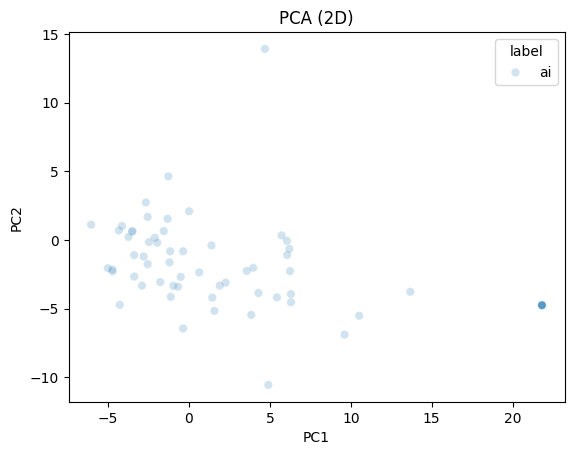

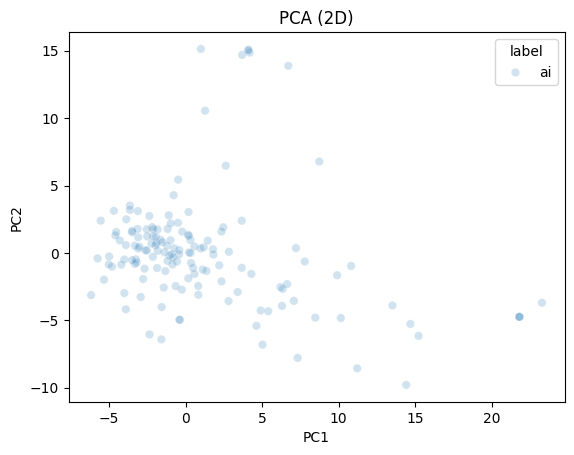

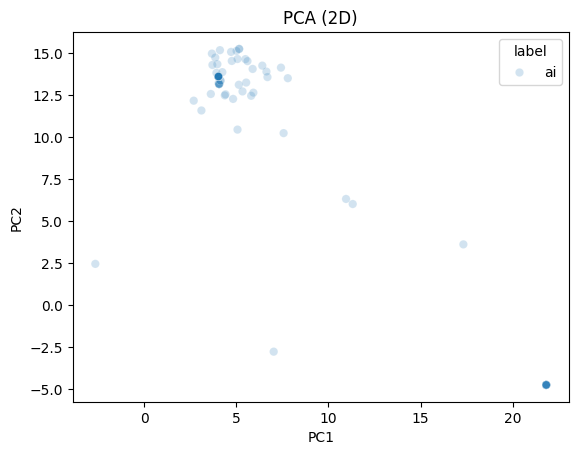

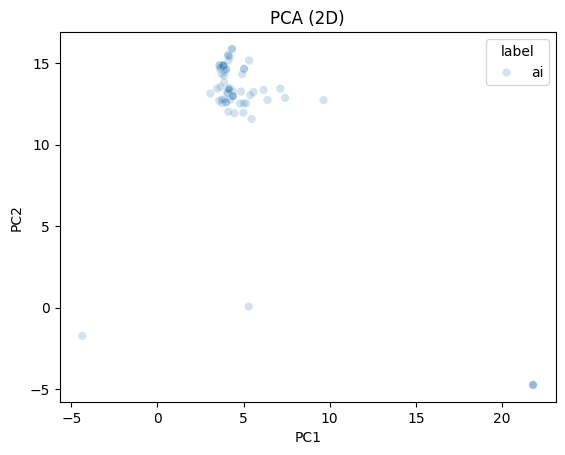

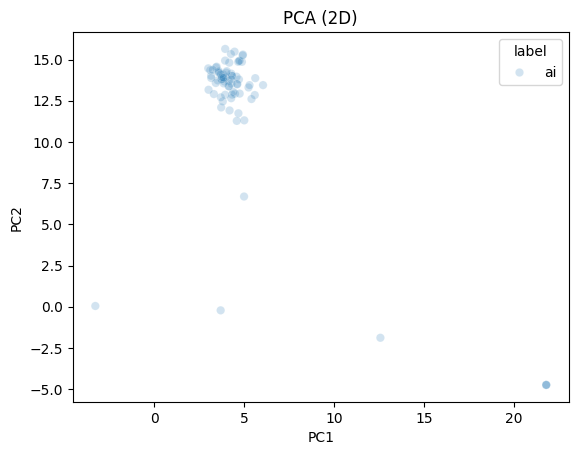

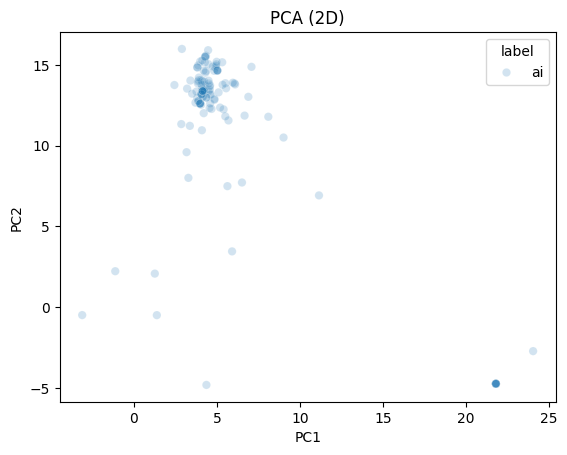

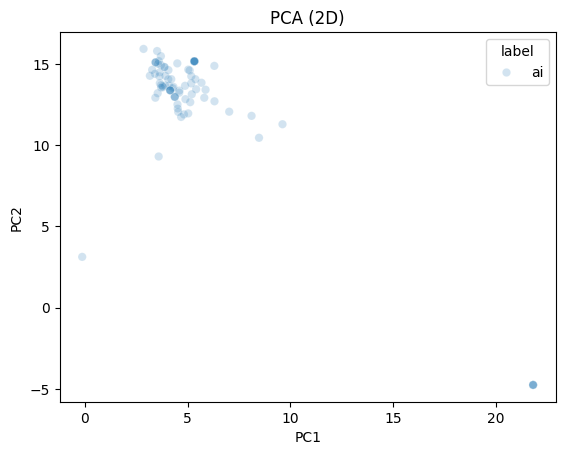

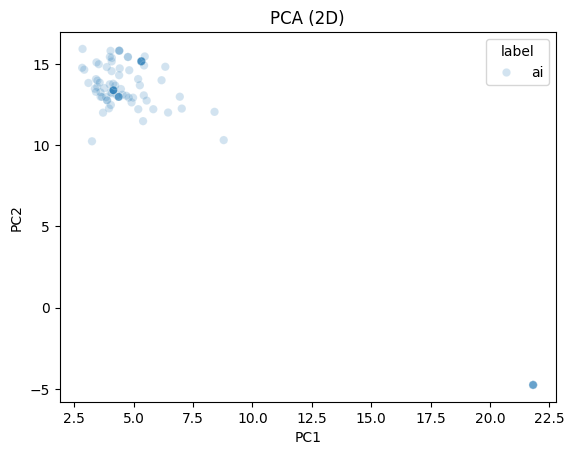

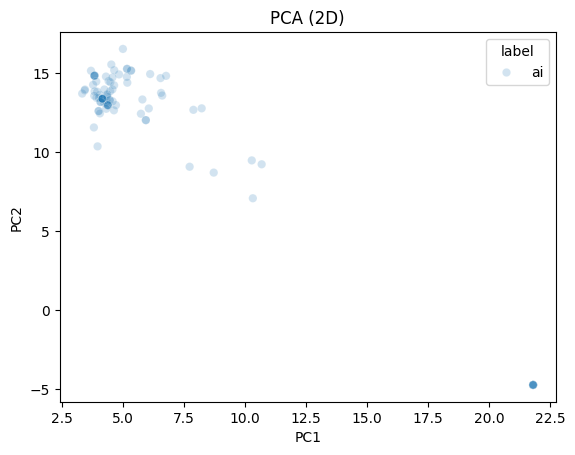

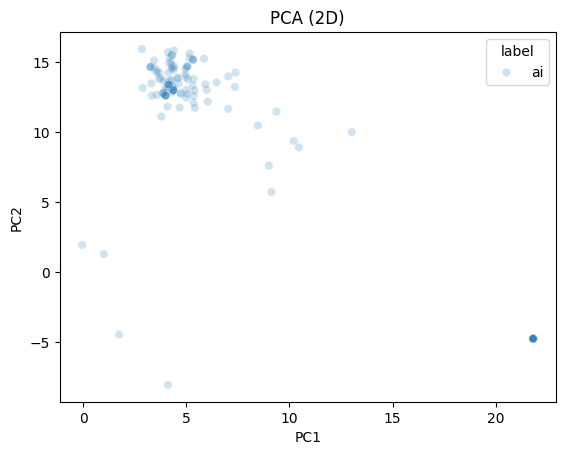

In [57]:
for video_id in training_data['video_id'].unique()[1000:1020]:
    mask_array = np.array([training_data['video_id'] == video_id]).squeeze()

    sns.scatterplot(
        x=X_2d[mask_array, 0],
        y=X_2d[mask_array, 1],
        hue=training_data['label'][mask_array],
        alpha=0.2
    )
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.title("PCA (2D)")
    plt.show()

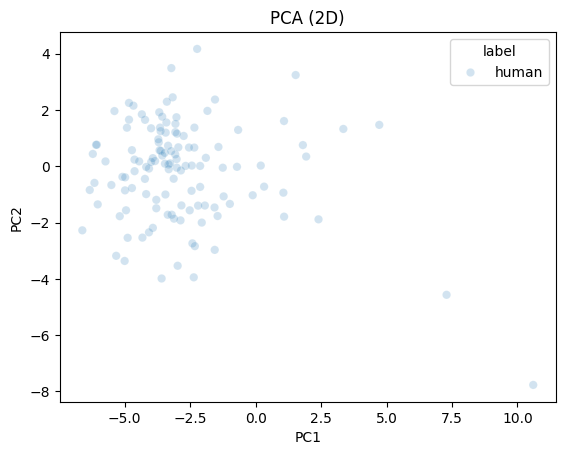

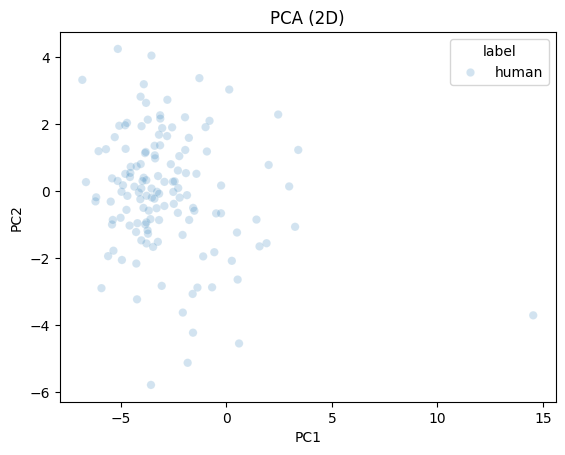

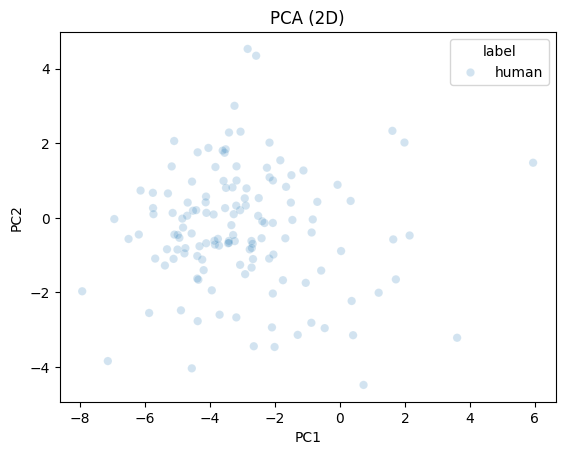

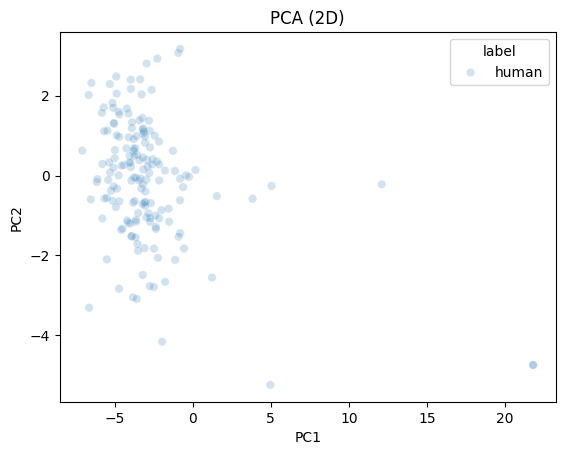

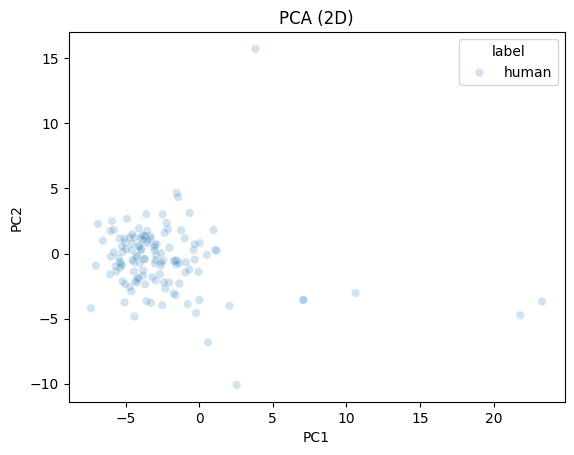

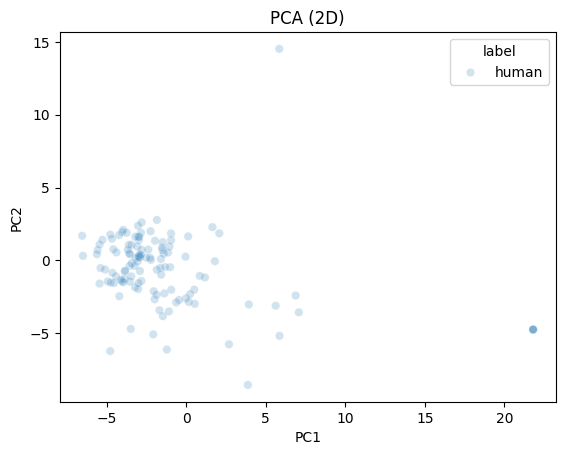

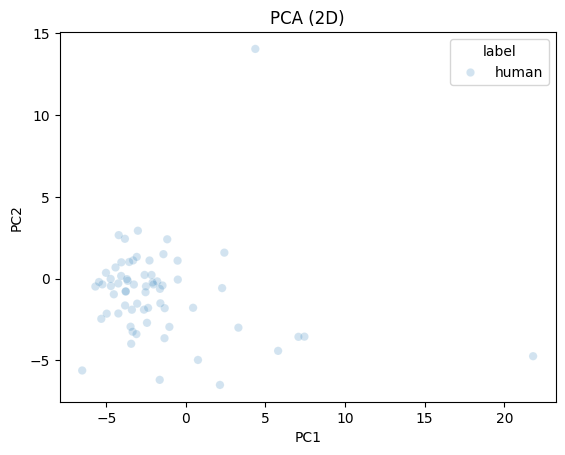

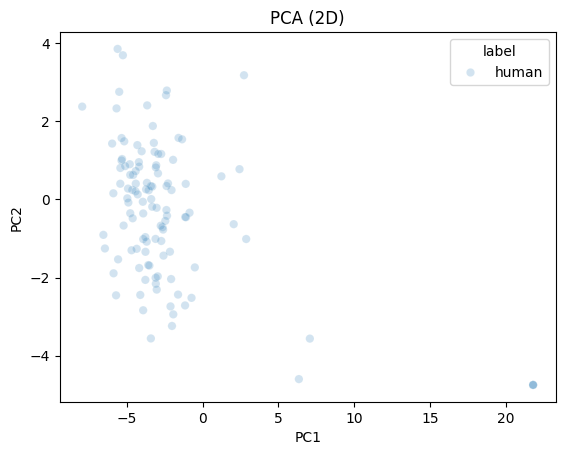

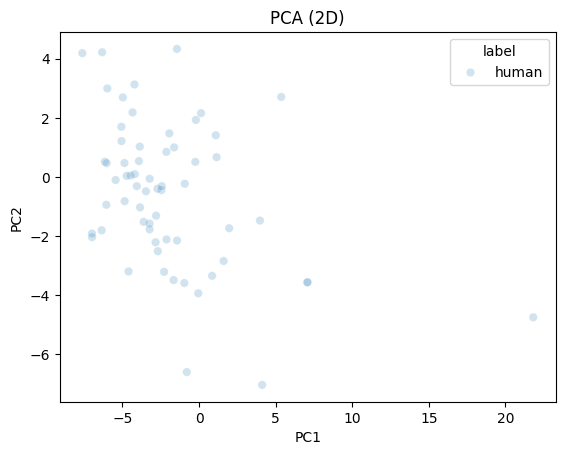

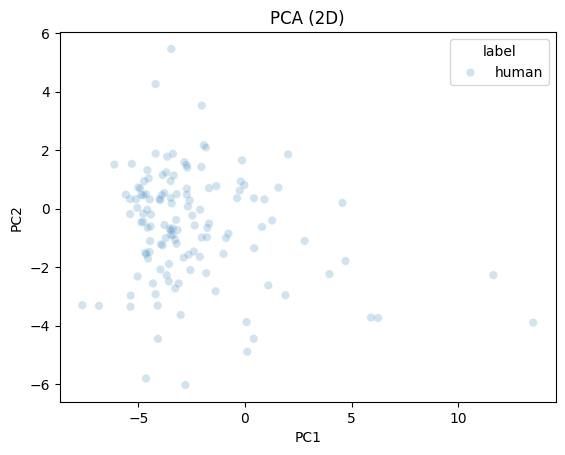

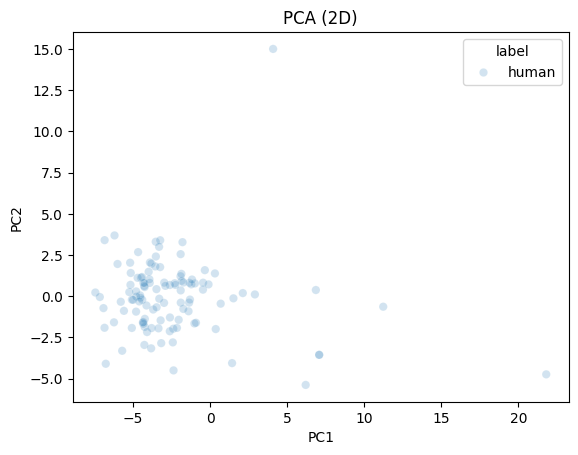

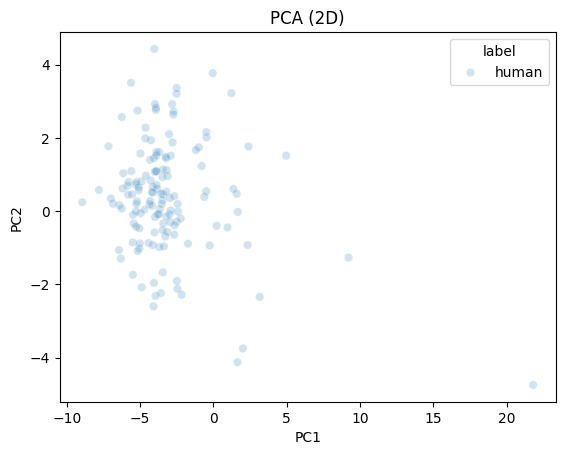

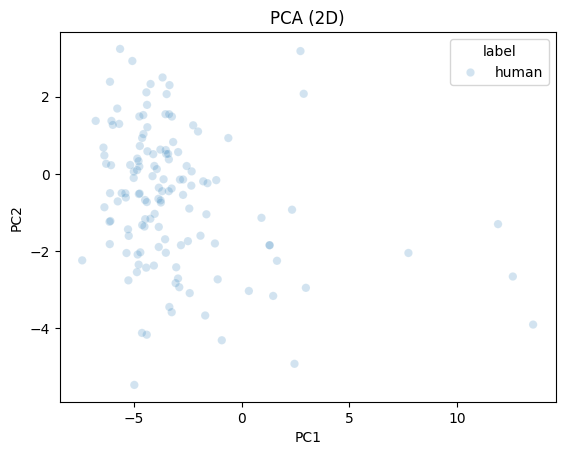

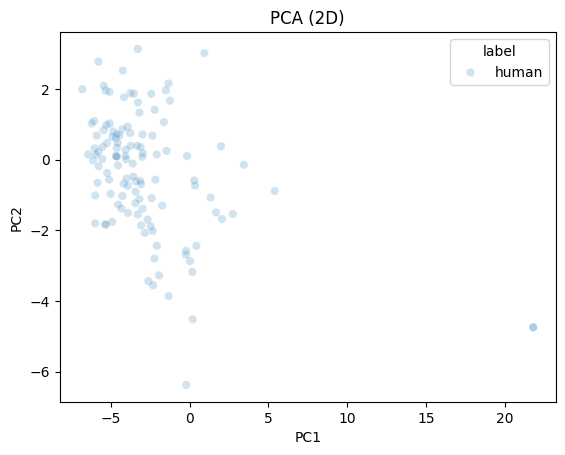

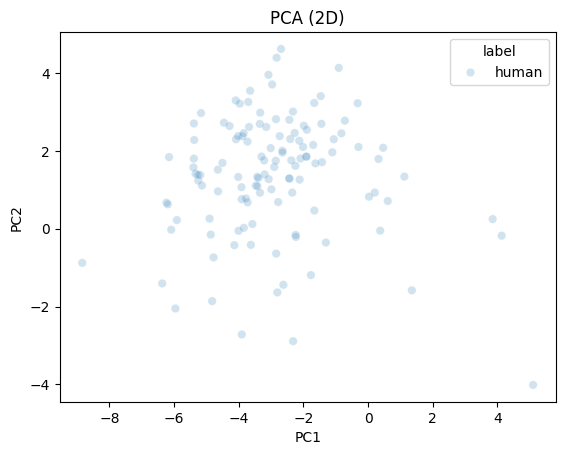

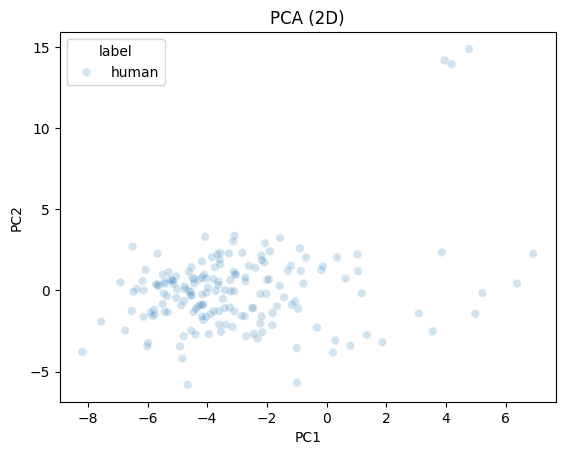

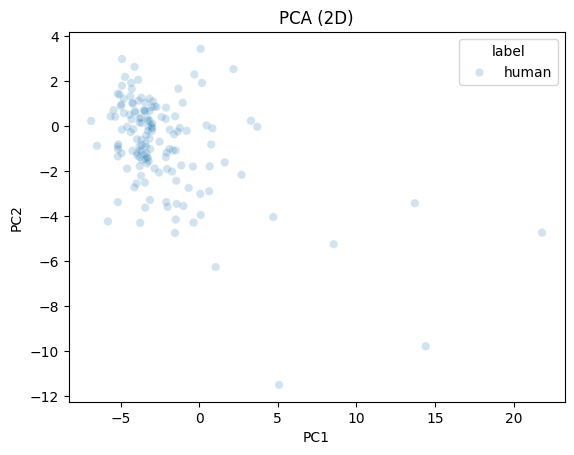

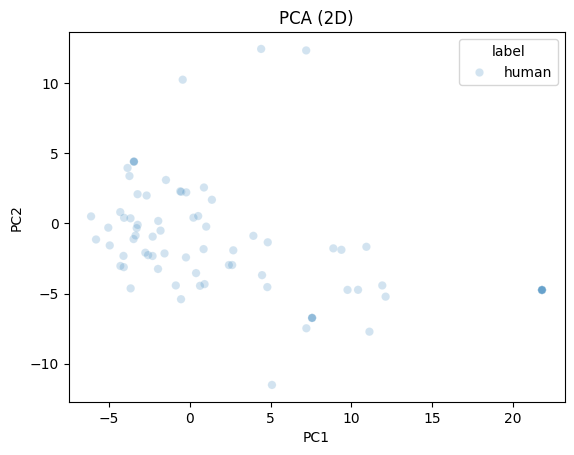

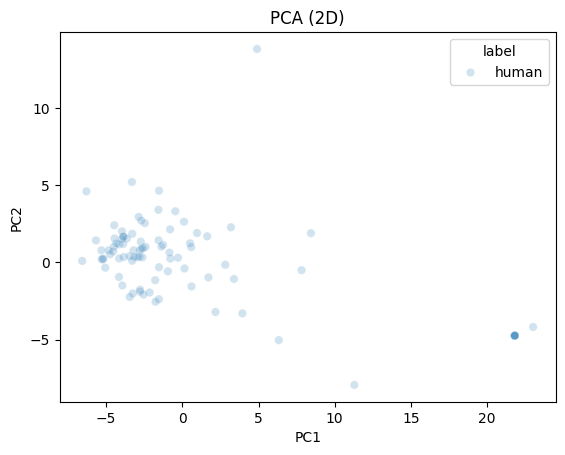

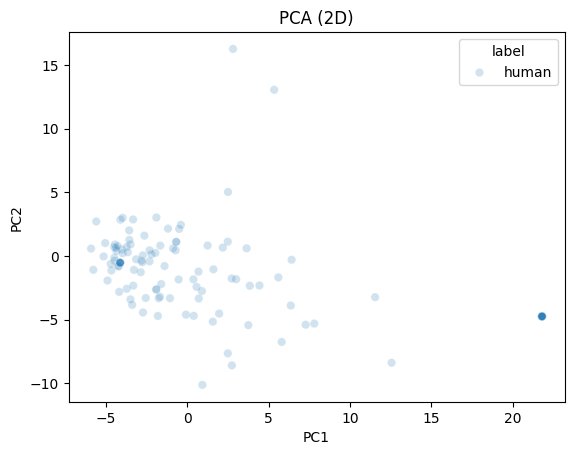

In [51]:
for video_id in training_data['video_id'].unique()[:20]:
    mask_array = np.array([training_data['video_id'] == video_id]).squeeze()

    sns.scatterplot(
        x=X_2d[mask_array, 0],
        y=X_2d[mask_array, 1],
        hue=training_data['label'][mask_array],
        alpha=0.2
    )
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.title("PCA (2D)")
    plt.show()

In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

# X: shape (n_samples, 384)
# ---------------------------------

# 1. Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 2. PCA (keep 95% variance or fixed components)
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

print(f"PCA reduced dimensions: {X_pca.shape[1]}")

# 3. Gaussian Mixture Model (2 clusters)
gmm = GaussianMixture(
    n_components=2,
    covariance_type="diag",  # or "diag" if samples are limited
    n_init=3,
    max_iter=50,
    random_state=42
)

gmm_labels = gmm.fit_predict(X_pca)

# 4. Soft probabilities (optional but useful)
probs = gmm.predict_proba(X_pca)

# 5. Validation
sil = silhouette_score(X_pca, gmm_labels)
print(f"Silhouette score: {sil:.3f}")


# Comment Embeddings

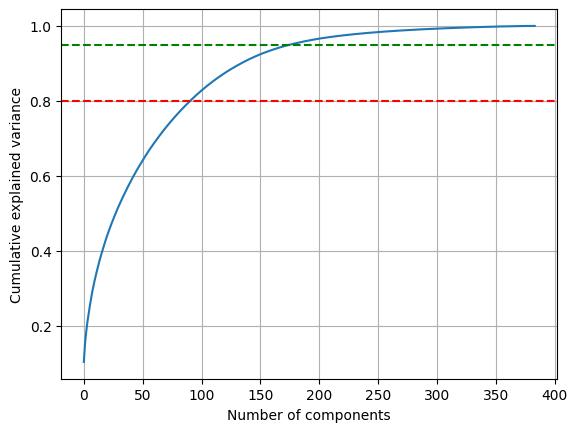

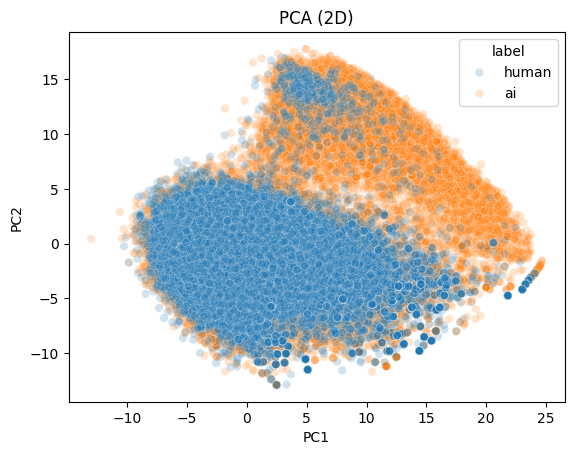

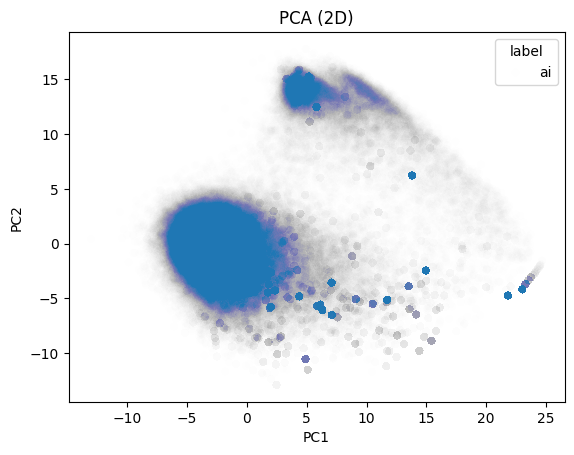

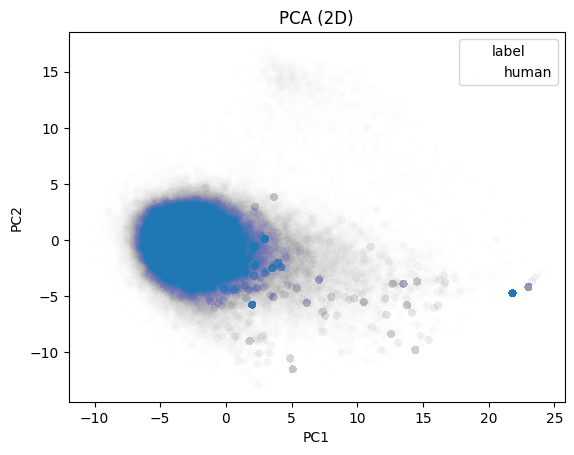

In [143]:
training_data = pd.read_csv('joey_data_with_video_ids.csv')

embedding_dims = [x for x in training_data.columns if 'embedding_dim' in x]
X = training_data[embedding_dims].to_numpy()
X_scaled = StandardScaler().fit_transform(X)

pca = PCA()
X_pca_full = pca.fit_transform(X_scaled)


cum_var = np.cumsum(pca.explained_variance_ratio_)

plt.plot(cum_var)
plt.axhline(0.80, color='r', linestyle='--')
plt.axhline(0.95, color='g', linestyle='--')
plt.xlabel("Number of components")
plt.ylabel("Cumulative explained variance")
plt.grid()
plt.show()

pca_2d = PCA(n_components=2)
X_2d = pca_2d.fit_transform(X_pca_full)

labels = training_data['label']

sns.scatterplot(
    x=X_2d[:, 0],
    y=X_2d[:, 1],
    hue=training_data['label'][:],
    alpha=0.2
)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA (2D)")
plt.show()

mask_array = np.array([training_data['label'] == 'ai']).squeeze()
sns.scatterplot(
    x=X_2d[mask_array, 0],
    y=X_2d[mask_array, 1],
    hue=training_data['label'][mask_array],
    alpha=0.005
)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA (2D)")
plt.show()

mask_array = np.array([training_data['label'] != 'ai']).squeeze()
sns.scatterplot(
    x=X_2d[mask_array, 0],
    y=X_2d[mask_array, 1],
    hue=training_data['label'][mask_array],
    alpha=0.005
)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA (2D)")
plt.show()

# Comment Embeddings Averages

/tmp/ipykernel_287552/770594538.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pca_df['PCA1'] = X_2d[:,0]
/tmp/ipykernel_287552/770594538.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pca_df['PCA2'] = X_2d[:,1]


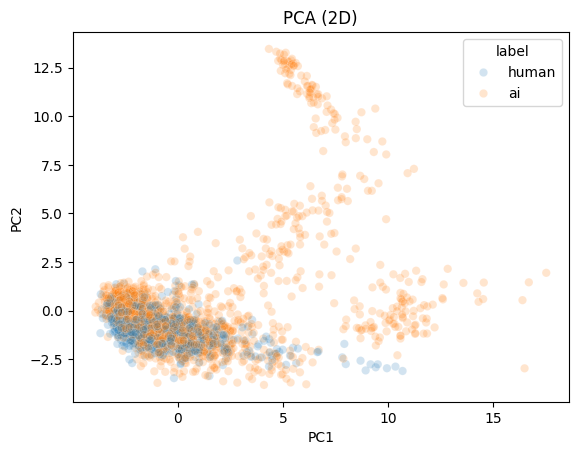

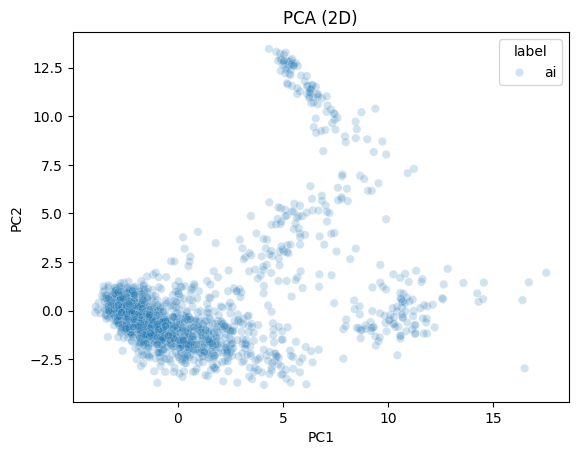

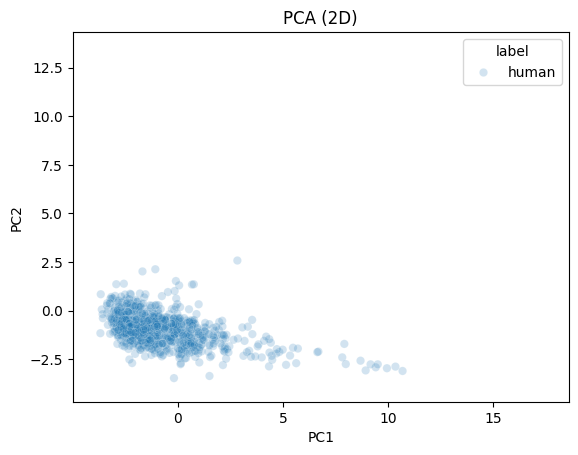

In [145]:
pca_df = pd.read_csv('joey_data_with_video_ids.csv')
pca_df['PCA1'] = X_2d[:,0]
pca_df['PCA2'] = X_2d[:,1]
a = pca_df.groupby('video_id')[['PCA1', 'PCA2']].mean()
b = pca_df.groupby('video_id')['label'].agg(lambda x: list(set(x))[0])

pca_df = a.join(b)

sns.scatterplot(
    x=pca_df['PCA1'],
    y=pca_df['PCA2'],
    hue=pca_df['label'],
    alpha=0.2
)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA (2D)")
xlim= plt.xlim()
ylim= plt.ylim()

plt.show()

mask_array = np.array([pca_df['label'] == 'ai']).squeeze()
sns.scatterplot(
    x=pca_df['PCA1'][mask_array],
    y=pca_df['PCA2'][mask_array],
    hue=pca_df['label'][mask_array],
    alpha=0.2
)
plt.xlim(xlim)
plt.ylim(ylim)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA (2D)")

plt.show()


mask_array = np.array([pca_df['label'] != 'ai']).squeeze()
sns.scatterplot(
    x=pca_df['PCA1'][mask_array],
    y=pca_df['PCA2'][mask_array],
    hue=pca_df['label'][mask_array],
    alpha=0.2
)
plt.xlim(xlim)
plt.ylim(ylim)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA (2D)")

plt.show()

# Using Description embeddings only

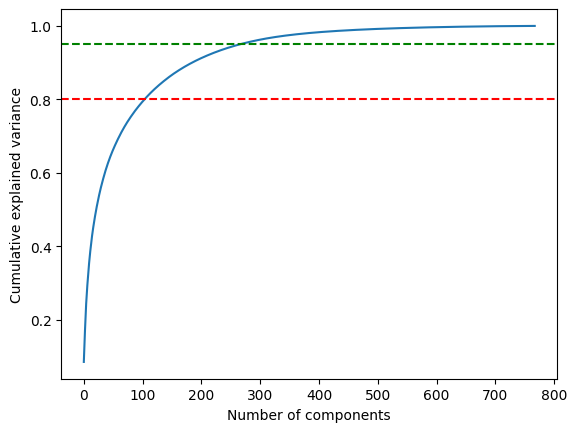

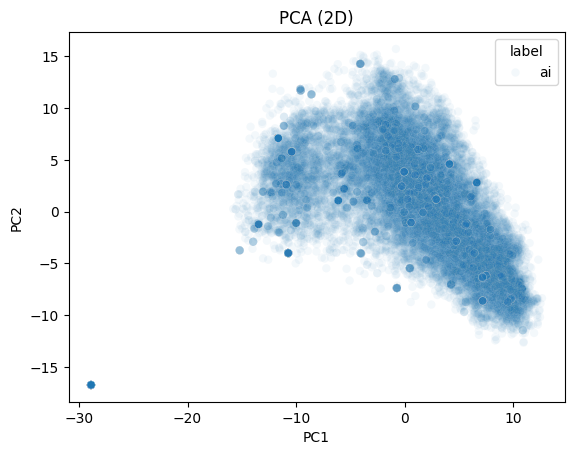

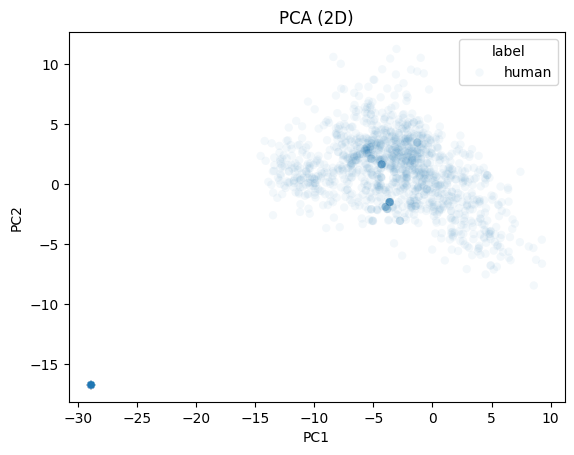

In [142]:
df = pd.read_parquet('labelled_desc_embeddings.parquet')

embedding_dims = [x for x in df.columns if 'desc_' in x]
X = df[embedding_dims].to_numpy()
X_scaled = StandardScaler().fit_transform(X)

pca = PCA()
X_pca_full = pca.fit_transform(X_scaled)


cum_var = np.cumsum(pca.explained_variance_ratio_)

plt.plot(cum_var)
plt.axhline(0.80, color='r', linestyle='--')
plt.axhline(0.95, color='g', linestyle='--')
plt.xlabel("Number of components")
plt.ylabel("Cumulative explained variance")
plt.show()

pca_2d = PCA(n_components=2)
X_2d = pca_2d.fit_transform(X_pca_full)

labels = df['label']

mask_array = np.array([df['label'] == 'ai']).squeeze()
sns.scatterplot(
    x=X_2d[mask_array, 0],
    y=X_2d[mask_array, 1],
    hue=df['label'][mask_array],
    alpha=0.05
)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA (2D)")
plt.show()

mask_array = np.array([df['label'] != 'ai']).squeeze()
sns.scatterplot(
    x=X_2d[mask_array, 0],
    y=X_2d[mask_array, 1],
    hue=df['label'][mask_array],
    alpha=0.05
)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA (2D)")
plt.show()

# Video Titles

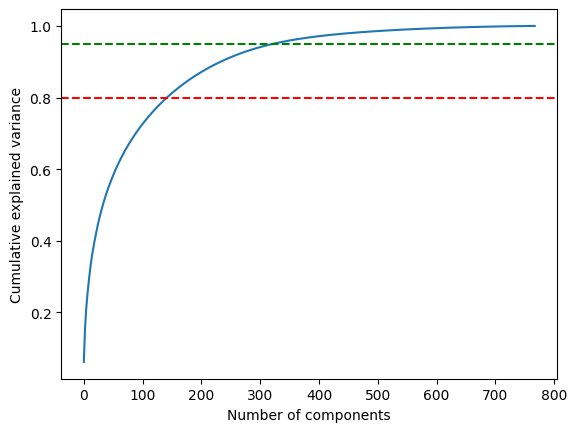

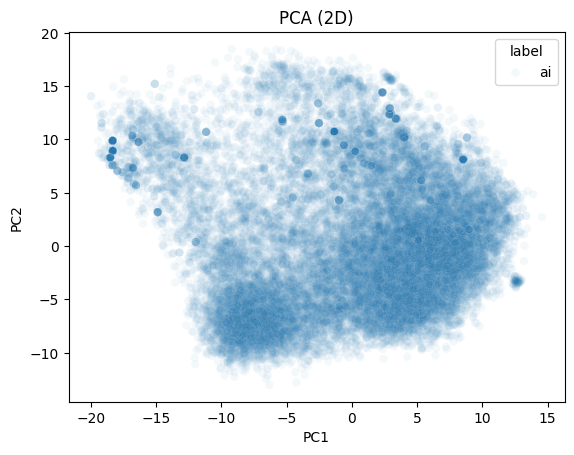

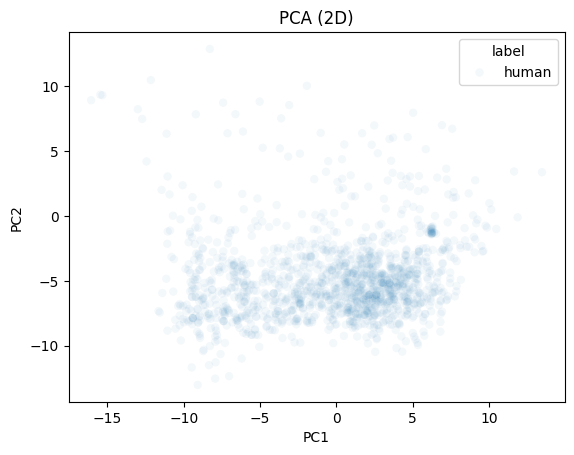

In [141]:
title_df = pd.read_parquet('sam_test_video_title_data.parket')

embedding_dims = [x for x in title_df.columns if 'title_embedding_' in x]
X = title_df[embedding_dims].to_numpy()
X_scaled = StandardScaler().fit_transform(X)

pca = PCA()
X_pca_full = pca.fit_transform(X_scaled)


cum_var = np.cumsum(pca.explained_variance_ratio_)

plt.plot(cum_var)
plt.axhline(0.80, color='r', linestyle='--')
plt.axhline(0.95, color='g', linestyle='--')
plt.xlabel("Number of components")
plt.ylabel("Cumulative explained variance")
plt.show()

pca_2d = PCA(n_components=2)
X_2d = pca_2d.fit_transform(X_pca_full)


mask_array = np.array([title_df['label'] == 'ai']).squeeze()
sns.scatterplot(
    x=X_2d[mask_array, 0],
    y=X_2d[mask_array, 1],
    hue=title_df['label'][mask_array],
    alpha=0.05
)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA (2D)")
plt.show()

mask_array = np.array([title_df['label'] != 'ai']).squeeze()
sns.scatterplot(
    x=X_2d[mask_array, 0],
    y=X_2d[mask_array, 1],
    hue=title_df['label'][mask_array],
    alpha=0.05
)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA (2D)")
plt.show()

# Upload Times Gini Coefficient

<Axes: xlabel='None', ylabel='0'>

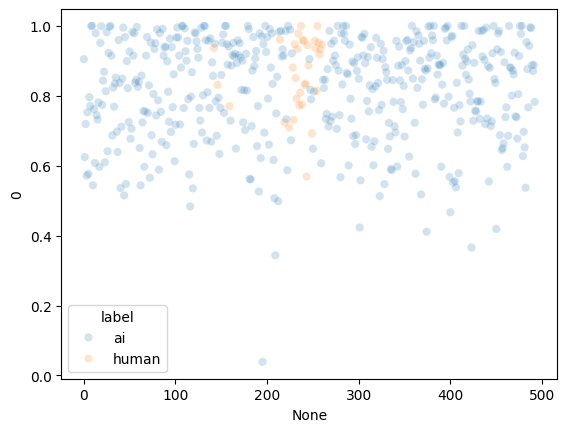

In [ ]:
def gini(x):
    """
    Calculate the Gini coefficient of a numpy array.
    Source: Stack Overflow (https://stackoverflow.com)
    """
    # Required for the formula: array elements must be sorted
    x = np.sort(np.array(x, dtype=np.float64))
    n = len(x)
    # The Gini coefficient is 2*Area Under Lorenz Curve - 1, after normalization
    # An equivalent and faster formula is this:
    indices = np.arange(1, n + 1)
    return ((2 * np.sum(indices * x)) / np.sum(x) - n - 1) / (n - 1)

df = pd.read_parquet('channel_upload_times2.paraquet')
bucket_dims = [x for x in df.columns if 'bucket_' in x]
bucket_df = df[bucket_dims].fillna(0)

gini_results = []
for i, row in bucket_df.iterrows():
    gini_results.append(gini(row.to_list()))


new_df = pd.DataFrame(data=gini_results)
new_df['label'] = df['label']
new_df

sns.scatterplot(
    x=new_df.index,
    y=new_df[0],
    hue=new_df['label'],
    alpha=0.2
)

# Channel Upload Times Distance and Variance

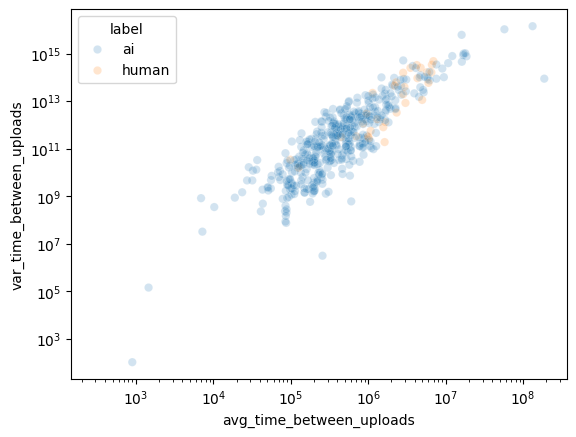

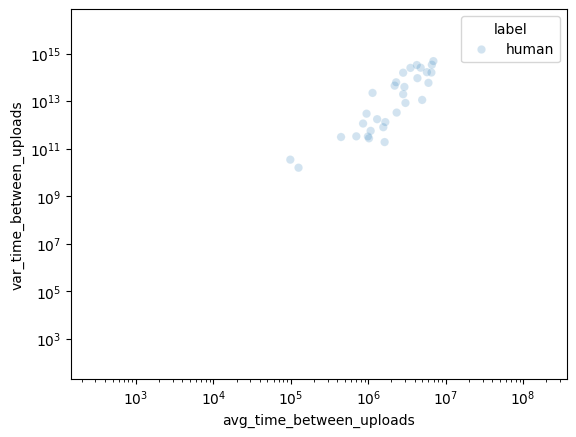

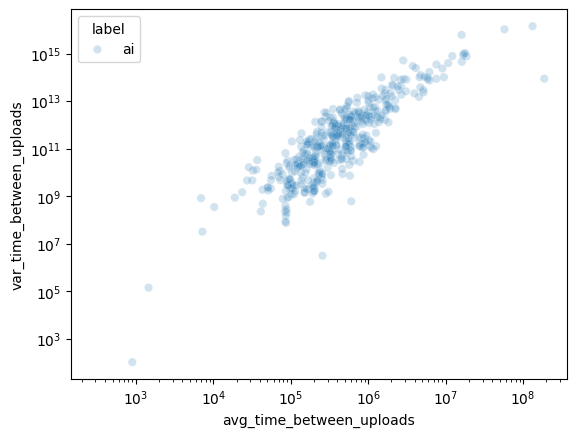

In [123]:
df = pd.read_parquet('channel_upload_times.paraquet')

sns.scatterplot(
    x=df['avg_time_between_uploads'],
    y=df['var_time_between_uploads'],
    hue=df['label'],
    alpha=0.2
)

plt.loglog()
xlim= plt.xlim()
ylim= plt.ylim()
plt.show()

mask_array = np.array([df['label'] != 'ai']).squeeze()

sns.scatterplot(
    x=df['avg_time_between_uploads'][mask_array],
    y=df['var_time_between_uploads'][mask_array],
    hue=df['label'][mask_array],
    alpha=0.2
)
plt.loglog()

plt.xlim(xlim)
plt.ylim(ylim)

plt.show()

mask_array = np.array([df['label'] == 'ai']).squeeze()

sns.scatterplot(
    x=df['avg_time_between_uploads'][mask_array],
    y=df['var_time_between_uploads'][mask_array],
    hue=df['label'][mask_array],
    alpha=0.2
)
plt.loglog()

plt.xlim(xlim)
plt.ylim(ylim)

plt.show()